#  Tech Assessment: Weather Trend Forecasting

## Objective

Analyze the "Global Weather Repository.csv" dataset to forecast future weather trends and showcase data science skills through both basic and advanced techniques. This dataset provides Daily weather information for cities around the world. This dataset offers a comprehensive set of features that reflect the weather conditions worldwide. It includes over 40 features.

Dataset
The dataset is available on the Kaggle website. 
World Weather Repository: https://www.kaggle.com/datasets/nelgiriyewithana/global-weather-repository/code


The dataset consists of 24052 entries and 41 columns, which include features such as temperature, wind speed, humidity and air quality indicators.

There are no missing values, indicating the dataset is complete and ready for analysis

## Step 1: Load the Dataset

In [1]:
import pandas as pd

# Load the dataset
file_path = 'GlobalWeatherRepository.csv'
weather_data = pd.read_csv(file_path)

# Display basic information about the dataset
print(weather_data.info())
print(weather_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24052 entries, 0 to 24051
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       24052 non-null  object 
 1   location_name                 24052 non-null  object 
 2   latitude                      24052 non-null  float64
 3   longitude                     24052 non-null  float64
 4   timezone                      24052 non-null  object 
 5   last_updated_epoch            24052 non-null  int64  
 6   last_updated                  24052 non-null  object 
 7   temperature_celsius           24052 non-null  float64
 8   temperature_fahrenheit        24052 non-null  float64
 9   condition_text                24052 non-null  object 
 10  wind_mph                      24052 non-null  float64
 11  wind_kph                      24052 non-null  float64
 12  wind_degree                   24052 non-null  int64  
 13  w

In [2]:
# Understanding the data

import plotly.graph_objects as go 

temperature_max = weather_data['temperature_celsius'].max()
temperature_min = weather_data['temperature_celsius'].min()
temperature_mean = weather_data['temperature_celsius'].mean()

fig = go.Figure(go.Indicator(
    mode="gauge+number", # Set the chart mode to gauge with a number
    value= temperature_mean, # Set the value 
    title={'text' : 'Temperature (°C)'},  # Set the title of the gauge chart
    gauge= { 'axis' : {'range' : [None, temperature_max]}, # Define the gauge axis range
            'steps' : [
                {'range' : [0, 10], 'color' : "seashell"}, # Define seashell color ranges for the gauge
                {'range' : [10, 20], 'color' : "lightblue"}, # Define lightblue color ranges for the gauge
                {'range' : [20, 30], 'color' : "sandybrown"}, # Define sandybrown color ranges for the gauge
                {'range' : [30, temperature_max], 'color' : "tomato"} # Define tomato color ranges for the gauge
            ],
            'threshold' : {
                'line' : {'color' : 'red', 'width' : 4}, # Define the threshold line's appearance
                'thickness' : 0.75, # Set the thickness of the threshold line
                'value' : temperature_mean # Set the value where the threshold line is located
                            }
    }
))

fig.update_layout(
    title = "Temperature Status", # Define the title
    height=400 # Define the height
)

fig.show()

This is an interactive gauge chart that shows the average temperature with different color ranges to indicate different temperature levels and a threshold line to highlight the average temperature value.

# Basic Assessment

## Step 2: Data Cleaning & Preprocessing
### Handle missing values
### Handle outliers
### Normalize the data

In [3]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Convert 'last_updated' to datetime
weather_data['last_updated'] = pd.to_datetime(weather_data['last_updated'])

# Handling missing values - fill with median for numerical values
numeric_cols = weather_data.select_dtypes(include=['float64', 'int64']).columns
weather_data[numeric_cols] = weather_data[numeric_cols].fillna(weather_data[numeric_cols].median())

# Detect and remove outliers using IQR method for key numerical columns
def remove_outliers(df, columns):
    Q1 = df[columns].quantile(0.25)
    Q3 = df[columns].quantile(0.75)
    IQR = Q3 - Q1
    df_clean = df[~((df[columns] < (Q1 - 1.5 * IQR)) | (df[columns] > (Q3 + 1.5 * IQR))).any(axis=1)]
    return df_clean

weather_data_clean = remove_outliers(weather_data, ['temperature_celsius', 'precip_mm', 'humidity', 'wind_kph'])

# Normalize numerical features like temperature, precipitation, wind speed, and humidity
scaler = MinMaxScaler()
weather_data_clean[['temperature_celsius', 'precip_mm', 'humidity', 'wind_kph']] = scaler.fit_transform(
    weather_data_clean[['temperature_celsius', 'precip_mm', 'humidity', 'wind_kph']]
)

# Check the cleaned and normalized data
print(weather_data_clean.head())


               country location_name  latitude  longitude         timezone  \
0          Afghanistan         Kabul     34.52      69.18       Asia/Kabul   
1              Albania        Tirana     41.33      19.82    Europe/Tirane   
2              Algeria       Algiers     36.76       3.05   Africa/Algiers   
4               Angola        Luanda     -8.84      13.23    Africa/Luanda   
5  Antigua and Barbuda  Saint John's     17.12     -61.85  America/Antigua   

   last_updated_epoch        last_updated  temperature_celsius  \
0          1715849100 2024-05-16 13:15:00             0.501718   
1          1715849100 2024-05-16 10:45:00             0.240550   
2          1715849100 2024-05-16 09:45:00             0.378007   
4          1715849100 2024-05-16 09:45:00             0.481100   
5          1715849100 2024-05-16 04:45:00             0.481100   

   temperature_fahrenheit condition_text  ...  air_quality_PM2.5  \
0                    79.8  Partly Cloudy  ...                8.4  

C:\Users\Owner\AppData\Local\Temp\ipykernel_10928\1341468975.py:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



This code performs data preprocessing on the weather_data DataFrame by:

Converting the last_updated column to datetime format.
Filling missing values in numerical columns with their median.
Removing outliers from key numerical columns using the IQR method.
Normalizing the cleaned numerical features (temperature, precipitation, wind speed, humidity) using Min-Max scaling.
Finally, it prints the first few rows of the cleaned and normalized data.

## Step 3: Exploratory Data Analysis (EDA)
### Perform basic EDA
### Visualize temperature and precipitation trends

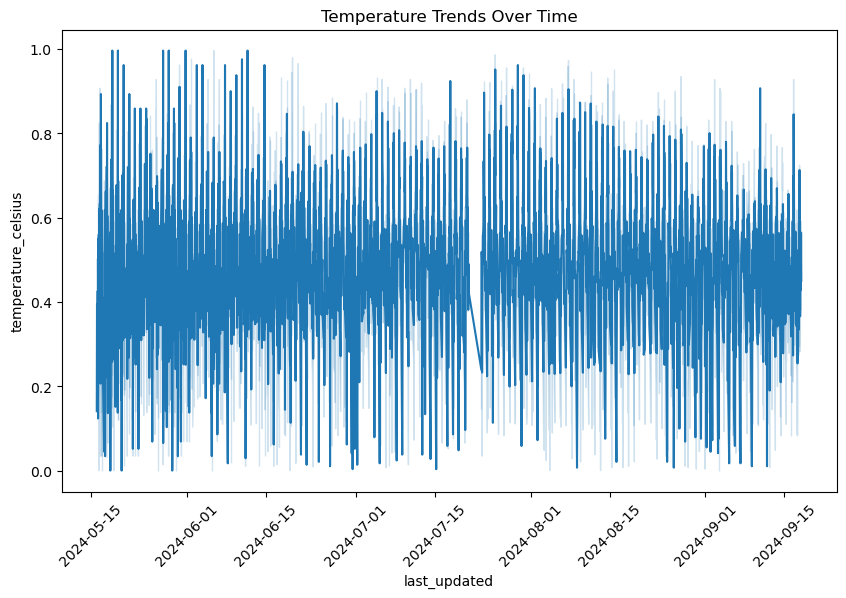

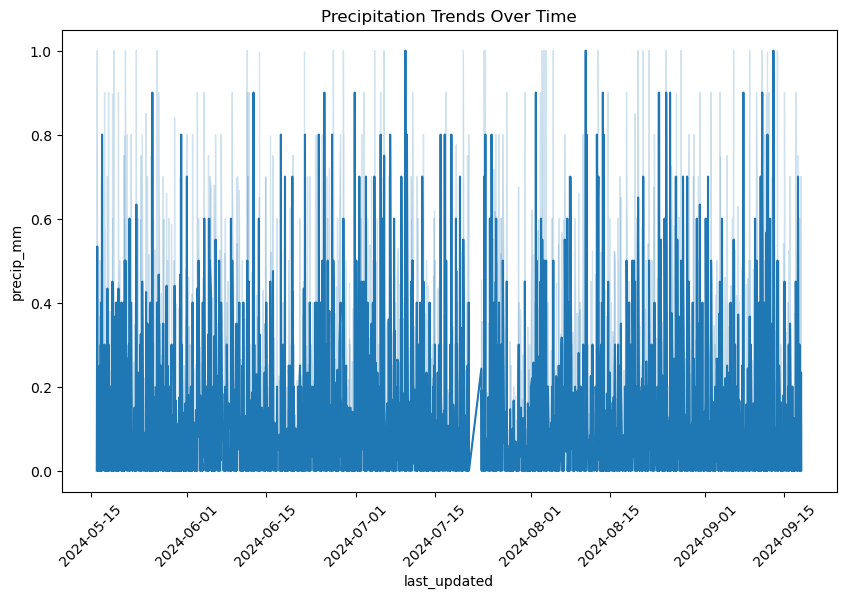

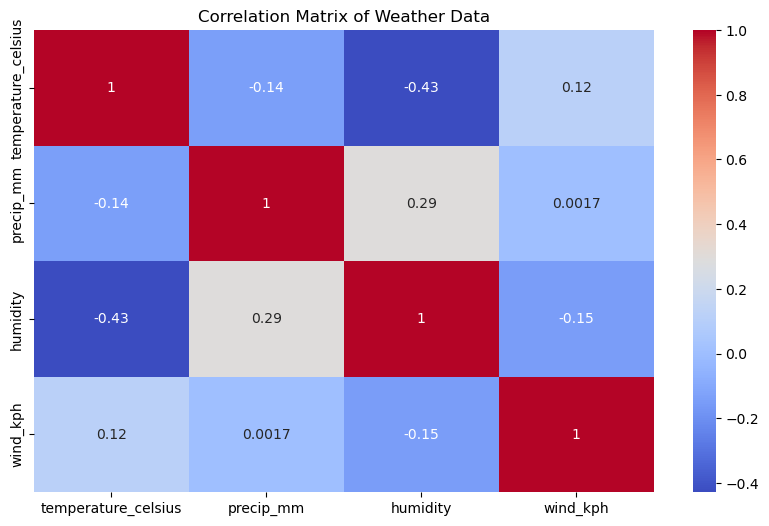

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Temperature trend visualization
plt.figure(figsize=(10, 6))
sns.lineplot(x='last_updated', y='temperature_celsius', data=weather_data_clean)
plt.title('Temperature Trends Over Time')
plt.xticks(rotation=45)
plt.show()

# Precipitation trend visualization
plt.figure(figsize=(10, 6))
sns.lineplot(x='last_updated', y='precip_mm', data=weather_data_clean)
plt.title('Precipitation Trends Over Time')
plt.xticks(rotation=45)
plt.show()

# Correlation matrix to uncover patterns
plt.figure(figsize=(10, 6))
sns.heatmap(weather_data_clean[['temperature_celsius', 'precip_mm', 'humidity', 'wind_kph']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Weather Data')
plt.show()

The plots show the below:

A line chart showing temperature trends over time.
A line chart depicting precipitation trends over time.
A heatmap of the correlation matrix for temperature, precipitation, humidity, and wind speed to reveal relationships between these variables.

## Step 4: Model Building (Time Series Forecasting)
### Use the last_updated field for time series analysis

C:\Users\Owner\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Owner\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

C:\Users\Owner\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

C:\Users\Owner\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



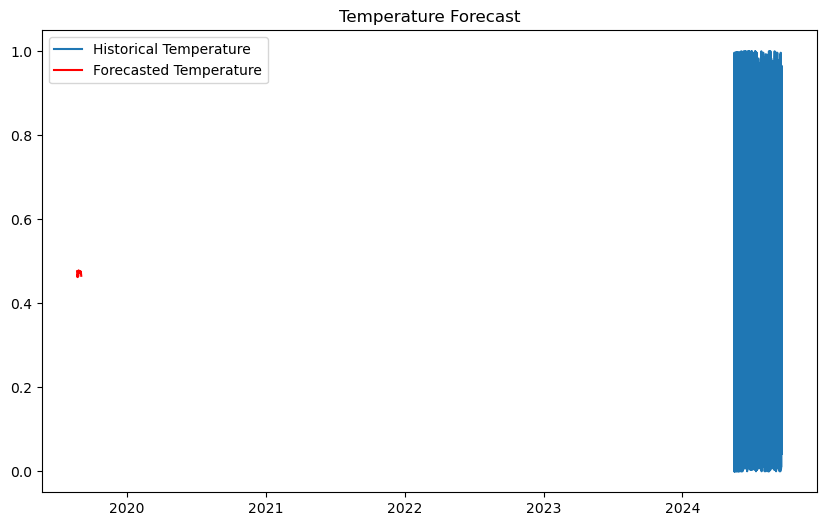

In [5]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Set 'last_updated' as the time index
weather_data_clean.set_index('last_updated', inplace=True)

# Build a basic time series model for temperature
model = ExponentialSmoothing(weather_data_clean['temperature_celsius'], trend='add', seasonal='add', seasonal_periods=12)
fit = model.fit()

# Forecast the next 12 time steps
forecast = fit.forecast(steps=12)

# Plot the historical data and forecasted values
plt.figure(figsize=(10, 6))
plt.plot(weather_data_clean.index, weather_data_clean['temperature_celsius'], label='Historical Temperature')
plt.plot(forecast.index, forecast, label='Forecasted Temperature', color='red')
plt.title('Temperature Forecast')
plt.legend()
plt.show()

This code performs time series forecasting using the Holt-Winters method:

Sets the last_updated column as the time index for the weather_data_clean DataFrame.
Builds and fits an Exponential Smoothing model with additive trend and seasonal components to the temperature data.
Forecasts the next 12 time steps and plots both historical temperature data and the forecasted values, with historical data shown in blue and forecasted values in red.

# Advanced Assessment

## Step 5: Advanced EDA
### Anomaly detection for outliers

C:\Users\Owner\AppData\Local\Temp\ipykernel_10928\252060656.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



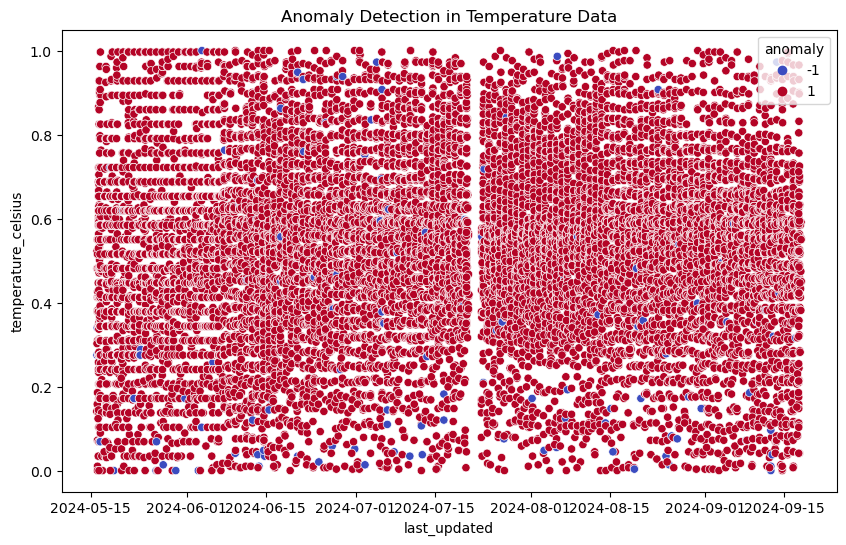

In [6]:
from sklearn.ensemble import IsolationForest

# Anomaly detection using Isolation Forest on numerical columns
iso_forest = IsolationForest(contamination=0.01)
weather_data_clean['anomaly'] = iso_forest.fit_predict(weather_data_clean[['temperature_celsius', 'precip_mm', 'humidity', 'wind_kph']])

# Visualize anomalies in temperature
plt.figure(figsize=(10, 6))
sns.scatterplot(x=weather_data_clean.index, y='temperature_celsius', hue='anomaly', data=weather_data_clean, palette='coolwarm')
plt.title('Anomaly Detection in Temperature Data')
plt.show()

This code performs anomaly detection using the Isolation Forest algorithm:

Detects anomalies in the weather_data_clean DataFrame based on the numerical columns (temperature_celsius, precip_mm, humidity, wind_kph), with a contamination rate of 1% to identify anomalies.
Adds an anomaly column to the DataFrame indicating whether each data point is an anomaly or not.
Visualizes anomalies in the temperature data by creating a scatter plot, where anomalies are highlighted with different colors using a coolwarm palette.

## Step 6: Forecasting with Multiple Models
### Compare models and create an ensemble

C:\Users\Owner\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Owner\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

C:\Users\Owner\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

C:\Users\Owner\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.

C:\Users\Owner\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, b

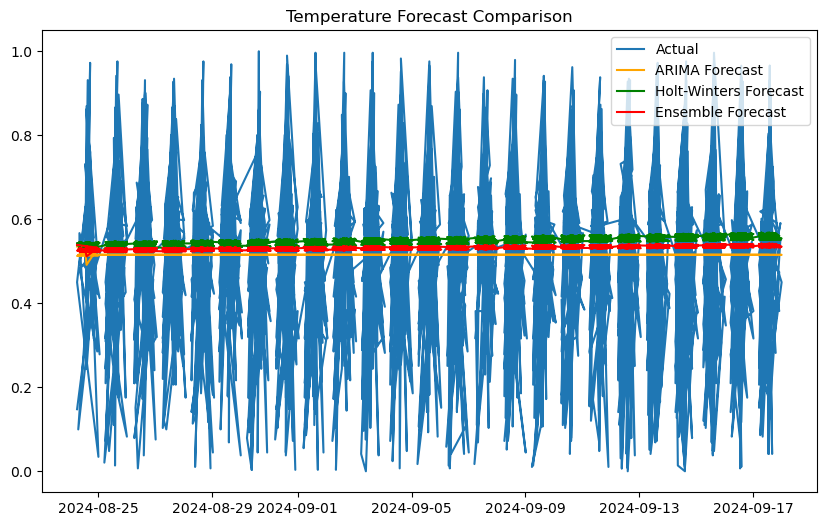

ARIMA RMSE: 0.1894964094694121
Holt-Winters RMSE: 0.19318236996428273
Ensemble RMSE: 0.19055208252934283


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Split data into train and test (ensure equal lengths for train and test)
train_size = int(len(weather_data_clean['temperature_celsius']) * 0.8)
train = weather_data_clean['temperature_celsius'][:train_size]
test = weather_data_clean['temperature_celsius'][train_size:]

# Holt-Winters Model (trained only on the train set)
hw_model = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=12)
hw_fit = hw_model.fit()

# Forecast with Holt-Winters
hw_forecast = hw_fit.forecast(steps=len(test))

# ARIMA model (trained only on the train set)
arima_model = ARIMA(train, order=(5, 1, 0))
arima_fit = arima_model.fit()

# Forecast with ARIMA
arima_forecast = arima_fit.forecast(steps=len(test))

# Ensemble model (combining Holt-Winters and ARIMA forecasts)
ensemble_forecast = (hw_forecast + arima_forecast) / 2

# Plot the test set and forecasts
plt.figure(figsize=(10, 6))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, arima_forecast, label='ARIMA Forecast', color='orange')
plt.plot(test.index, hw_forecast, label='Holt-Winters Forecast', color='green')
plt.plot(test.index, ensemble_forecast, label='Ensemble Forecast', color='red')
plt.title('Temperature Forecast Comparison')
plt.legend()
plt.show()

# Evaluate performance
arima_rmse = np.sqrt(mean_squared_error(test, arima_forecast))
hw_rmse = np.sqrt(mean_squared_error(test, hw_forecast))
ensemble_rmse = np.sqrt(mean_squared_error(test, ensemble_forecast))

print("ARIMA RMSE:", arima_rmse)
print("Holt-Winters RMSE:", hw_rmse)
print("Ensemble RMSE:", ensemble_rmse)


This code performs time series forecasting using Holt-Winters and ARIMA models on training data, and combines their forecasts into an ensemble. It splits the data into training and testing sets, fits each model on the training data, and forecasts the test period. The forecasts are then plotted alongside actual values to compare performance, and the Root Mean Squared Error (RMSE) is calculated for each model to evaluate accuracy.

A lower RMSE indicates better accuracy. This means the ARIMA performs better than the Holt-Winters model.

## Step 7: Unique Analyses
### Climate Analysis (Long-term trends)

C:\Users\Owner\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 28779 (\N{CJK UNIFIED IDEOGRAPH-706B}) missing from current font.

C:\Users\Owner\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 40481 (\N{CJK UNIFIED IDEOGRAPH-9E21}) missing from current font.



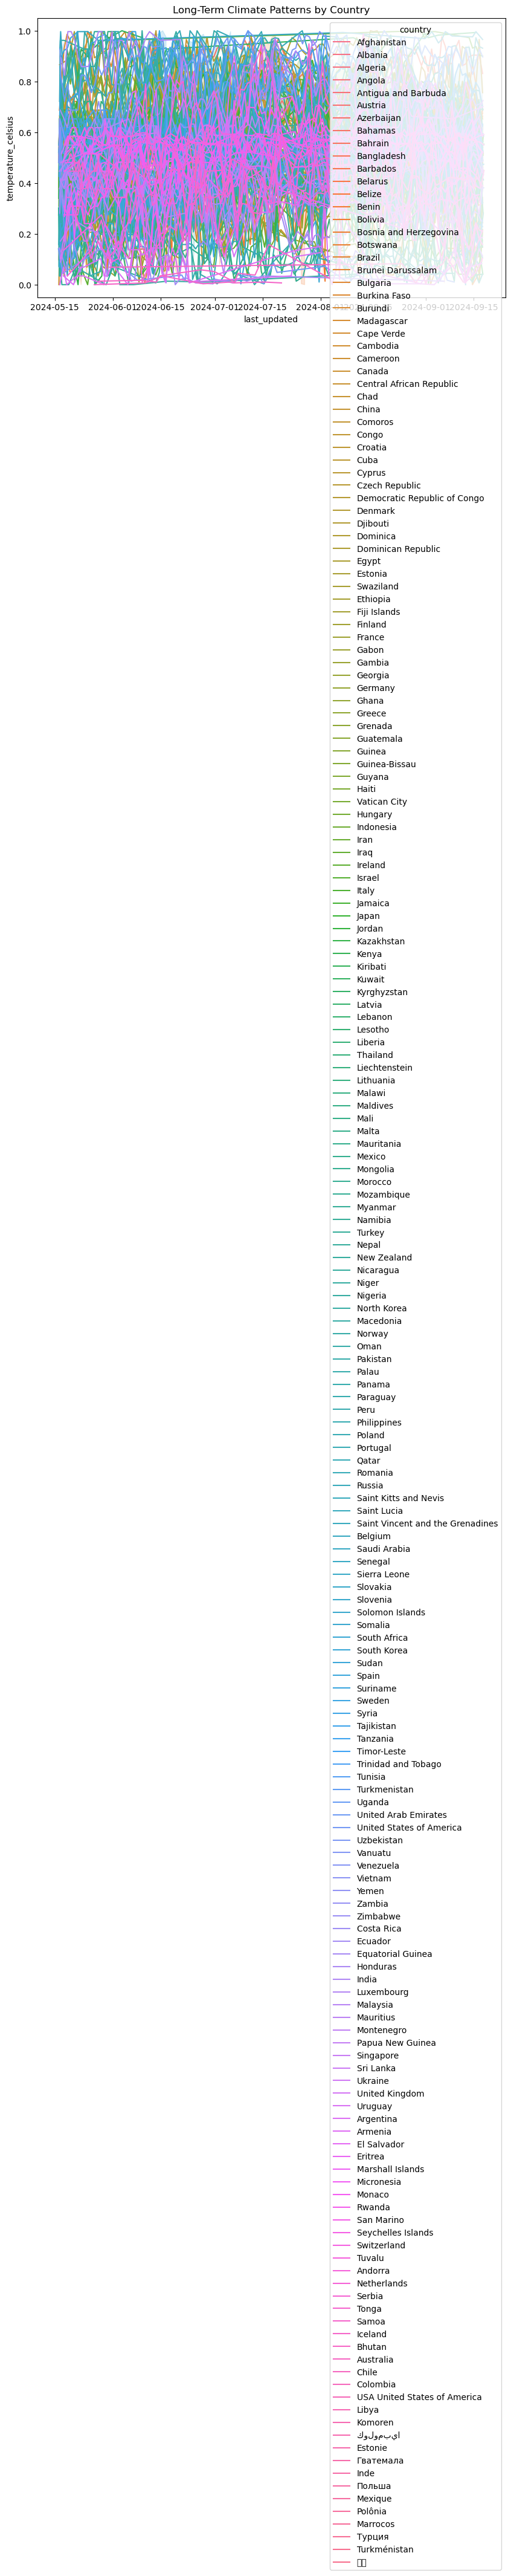

In [8]:
# Visualizing climate patterns in different regions
plt.figure(figsize=(10, 6))
sns.lineplot(x=weather_data_clean.index, y='temperature_celsius', hue='country', data=weather_data_clean)
plt.title('Long-Term Climate Patterns by Country')
plt.show()


This code visualizes long-term climate patterns by plotting temperature trends for different countries. It creates a line plot with `temperature_celsius` on the y-axis and time on the x-axis, using different colors to represent different countries. The plot helps in comparing temperature patterns across regions over time.

### Environmental Impact (Correlation between air quality and weather)

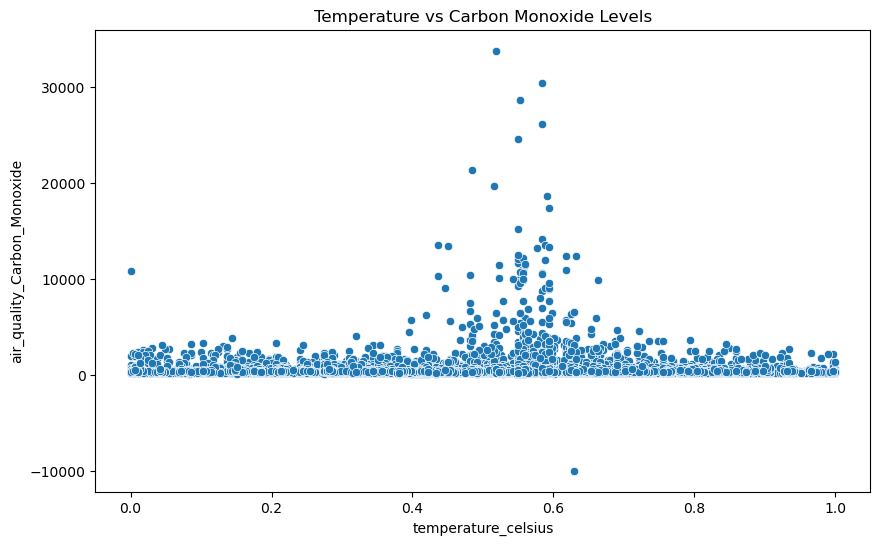

In [9]:
# Correlation between temperature and air quality (Carbon Monoxide)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temperature_celsius', y='air_quality_Carbon_Monoxide', data=weather_data_clean)
plt.title('Temperature vs Carbon Monoxide Levels')
plt.show()


This code creates a scatter plot to examine the relationship between temperature and carbon monoxide (CO) levels. It plots `temperature_celsius` on the x-axis and `air_quality_Carbon_Monoxide` on the y-axis, helping to visualize any correlation between temperature and CO levels. The plot is titled "Temperature vs Carbon Monoxide Levels" for clear interpretation.

### Feature Importance

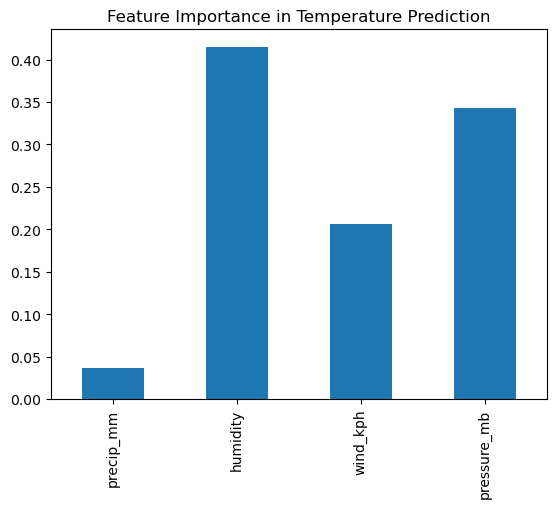

In [10]:
from sklearn.ensemble import RandomForestRegressor

# Build a Random Forest model to assess feature importance
X = weather_data_clean[['precip_mm', 'humidity', 'wind_kph', 'pressure_mb']]
y = weather_data_clean['temperature_celsius']

rf_model = RandomForestRegressor()
rf_model.fit(X, y)

# Plot feature importance
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importance.plot(kind='bar', title='Feature Importance in Temperature Prediction')
plt.show()


This code uses a Random Forest model to assess the importance of different features in predicting temperature:

1. **Model Training:** It trains a `RandomForestRegressor` on features (`precip_mm`, `humidity`, `wind_kph`, `pressure_mb`) to predict `temperature_celsius`.
2. **Feature Importance:** Computes the importance of each feature in the model and plots these importances as a bar chart.
3. **Visualization:** The bar chart displays the contribution of each feature to temperature prediction, helping identify which features are most influential.

### Spatial Analysis (Geographical patterns)

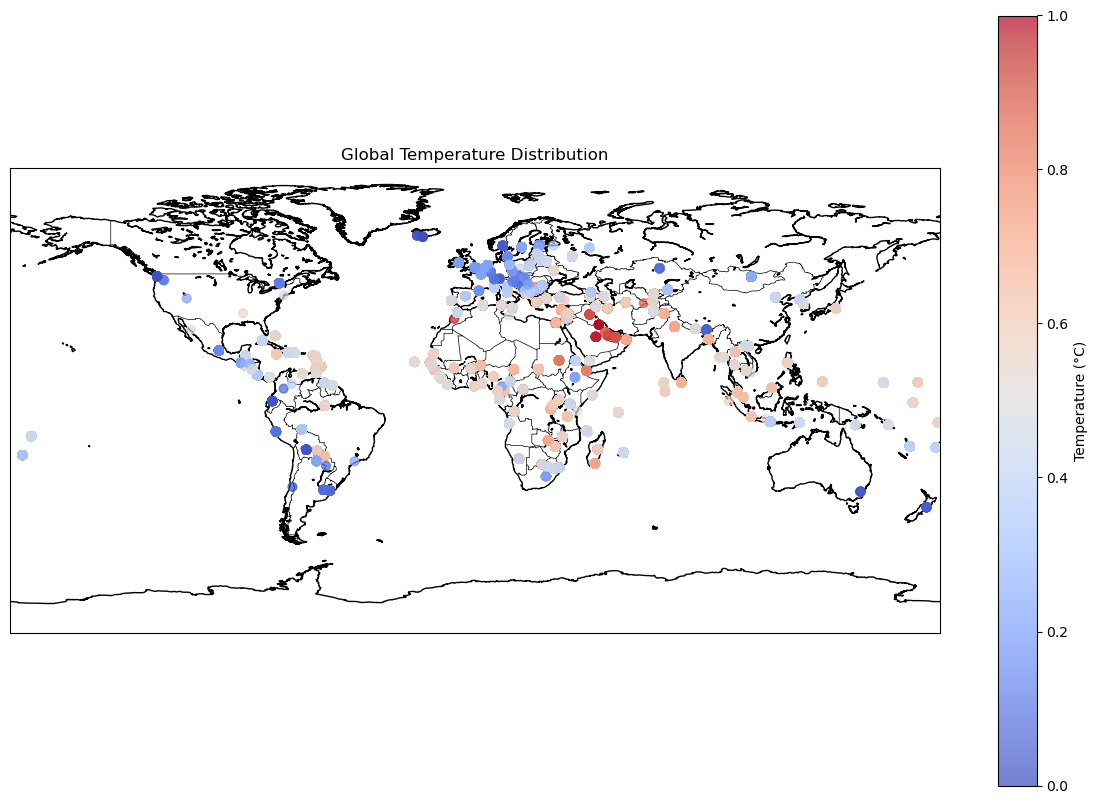

In [11]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np

# Creating a map for the world
plt.figure(figsize=(15, 10))
m = Basemap(projection='cyl', resolution='l', 
            llcrnrlat=-90, urcrnrlat=90,  # Latitude range
            llcrnrlon=-180, urcrnrlon=180)  # Longitude range

# Drawing coastlines and countries
m.drawcoastlines()
m.drawcountries()

# Scatter plot for temperature data on the map
latitudes = weather_data_clean['latitude'].values
longitudes = weather_data_clean['longitude'].values
temperatures = weather_data_clean['temperature_celsius'].values

# Plot the temperature data with color coding for temperature intensity
scatter = m.scatter(longitudes, latitudes, c=temperatures, cmap='coolwarm', marker='o', s=40, alpha=0.7, zorder=5)

# Add a colorbar and labels
plt.colorbar(scatter, label='Temperature (°C)')
plt.title('Global Temperature Distribution')

# Show the map
plt.show()

This code creates a global map visualization of temperature distribution:

1. **Map Creation:** Initializes a cylindrical map projection with coastlines and country borders using `Basemap`.
2. **Temperature Data Plotting:** Plots temperature data points on the map using latitude and longitude, with color coding to represent temperature intensity.
3. **Colorbar and Title:** Adds a colorbar to indicate temperature values and sets the plot title to "Global Temperature Distribution."

This map helps visualize temperature variations across different geographic locations.

In [12]:
# Create an interactive temperature heatmap using Plotly Express
import plotly.express as px

fig = px.scatter_geo(
    weather_data,
    lat='latitude',
    lon='longitude',
    color='temperature_celsius',
    hover_name='location_name',
    projection='natural earth',  # Adjust the projection as needed
    title='Interactive Global Temperature Heatmap',
)

fig.update_geos(showcoastlines=True, coastlinecolor="Black", showland=True, landcolor="white")

# Show the interactive map
fig.show()

This code creates an interactive global temperature heatmap using Plotly Express:

1. **Map Creation:** Initializes a scatter plot on a geographic map with `latitude` and `longitude` as coordinates and `temperature_celsius` as the color dimension.
2. **Interactive Features:** Adds hover information with `location_name` and uses the "natural earth" projection.
3. **Map Customization:** Updates the map to show coastlines and land with specified colors for better visibility.

The result is an interactive map that visually represents temperature variations around the globe, allowing users to explore temperature data dynamically.